In [4]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from IPython import display
from base64 import b64decode


import numpy as np
import qiskit as qk

from fractions import Fraction
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-02 18:54:35,692: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
simulator = qk.BasicAer.get_backend('qasm_simulator')
real = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > 4,
                                            operational=True, simulator=False))

'''Sajnos az elérhető kvantum gépek közül 5 qubites a legnagyobb, így a legtöbb kódot
csak a szimulátoron lehet majd kipróbálni. Ráadásul az áramkörök túl hosszúak lesznek ahhoz, hogy az igazi kvantumgépeken
hiba nélkül lefussanak, úgyhogy a szimulátort érdemes használni.'''

'Sajnos az elérhető kvantum gépek közül 5 qubites a legnagyobb, így a legtöbb kódot\ncsak a szimulátoron lehet majd kipróbálni. Ráadásul az áramkörök túl hosszúak lesznek ahhoz, hogy az igazi kvantumgépeken\nhiba nélkül lefussanak, úgyhogy a szimulátort érdemes használni.'

# Shor-algoritmus
A Shor-algoritmus egy kvantumalgoritmus, ami egy $N$ egész számot bont fel prímtényezőire. A Shor-algoritmus nagy számokat jóval kevesebb művelet segítségével tud felbontani prímtényezőkre, mint a klasszikus számítógépeken futtatható algoritmusok. Az algoritmus azért fontos a gyakorlatban, mert sok titkosítási eljárás arra épül, hogy nagy számokat klasszikus számítógép segítségével rengeteg időbe telik felbontani. Egy ilyen titkosítási eljárásra épülő rendszert a Shor-algoritmus segítségével fel lehetne törni, ha lenne egy működőképes kvantumszámítógépünk.

### Perióduskeresés

A Shor-algoritmus arra épül, hogy a prímtényezők keresése visszavezethető az perióduskeresés problémájára, amit kvantumszámítógép segítségével ,,gyorsan'' el tudunk végezni.<br>
A perióduskeresés problémája a következő: Adott egy $N$ egész szám (ezt szeretnénk majd később prímtényezőkre bontani), illetve egy $a<N$ egész szám, melyekre igaz, hogy $\text{lnko}(a, N)=1$. ($\text{lnko}(a, N)$ az $a$ és $N$ számok legnagyobb közös osztóját jelöli.) Szeretnénk megtalálni azt a legkisebb $r$ számot, amire igaz, hogy $a^r = 1$ $\text{mod} $ $N$, azaz $a^r$-nek az $N$ szerinti maradéka 1.

**1. feladat**

Írjunk egy kódot, ami megkeresi az $a=7$ szám $N=15$ szerinti periódusát. (Papíron könnyen ellenőrizhetjük, hogy jó eredményt kaptunk-e.) <br>Maximum hány darab szorzást kell elvégeznie egy klasszikus számítógépnek, hogy kiszámolja az $r$ periódust egy tetszőleges $N$ szám esetén? <br>
Megjegyzés: A Shor-algoritmus futtatásakor pontosan ez az a művelet, amit a kvantumszámítógép végez el. 

In [10]:
# megoldás helye







### Prímtényező keresése a periódus segítségével

**1. Állítás**: Legyen $r$ az $N$ szám $a$ szerinti periódusa. Ha $r$ páros és $a^{r/2} \not= N-1$ $\text{mod}$ N, akkor vagy $\text{lnko}(a^{r/2}+1, N)$, vagy $\text{lnko}(a^{r/2}-1, N)$ nem triviális osztója $N$-nek. (Azt az osztót hívjuk $N$ nem triviális osztójának, ami nem $N$ és nem 1.)<br><br> 

**2. feladat (szorgalmi)** 

Lássuk be a fenti állítást.<br><br>

**Megjegyzés**: Belátható, hogy ha véletlenszerűen választunk egy $a$ számot, akkor az $a$ szám $N$ szerinti periódusa ,,kellően nagy" valószínűséggel teljesíti az 1. Állítás feltételeit, tehát  kellően nagy valószínűséggel találunk egy osztót.

### Perióduskeresés kvantumszámítógéppel

Az alábbi képen az az áramkör látható, amivel meg tudjuk keresni az $a$ szám $N$ szerinti periódusát. Az $N$ szám tárolásához szükséges bitek számát $n$ jelöli. Az áramkör $3n$ qubitet használ.  A felső $k = 2n$ qubit úgynevezett kontroll qubit. Speciális esetben ennél kevesebb kontroll qubit is elég, ahogy ezt látni fogjuk a lenti példán. Az alsó $n$ qubiten tárolt számot hívjuk $b$-nek, kezdetben $b=1$. Az ábrán látható $U_a$-val jelölt kapuk $a$-val modulo $N$ szorzó kapuk. A Shor-algoritmus futtatásakor ezek létrehozása  a legnehezebb és egyben a legerőforrásigényesebb feladat. Az áramkör a következő lépésekből épül fel: Először a kontroll qubitekre Hadamard kapukkal hatunk. Ezt követően a kontrollált-$U_a$ kvantumkapu különboző hatványival hatunk az áramkörre az ábrán látható módon. Végül az úgynevezett kvantum Fourier-transzformáció inverzével hatunk a kontroll qubitekre. A kvantum Fourier-transzformáció részleteibe most nem megyünk bele. <br><br> 
**2. Állítás:** Ha a keresett $r$ periódus kettőhatvány, akkor az ábrán látható kvantumáramkör futtatása utáni mérés eredménye a $2^k\frac{s}{r}$ szám, ahol $k$ a kontroll qubitek száma, $r$ a keresett periódus, $s$ egy véletlen szám, ami minden 0 és r-1 közötti szám $\frac{1}{r}$ valószínűséggel lehet. Ha $s$ és $r$ relatív prímek, akkor a mért tört nevezőjéből ki tudjuk olvani az $r$ periódust.

**Megjegyzés**: Ha $r$ nem kettőhatvány, akkor $2^k\frac{s}{r}$ nem egész szám. Ekkor egy ehhez közel eső egész számot mérünk, amiből meg tudjuk határozni a periódust az úgynevezett lánctört algoritmus segítségével.


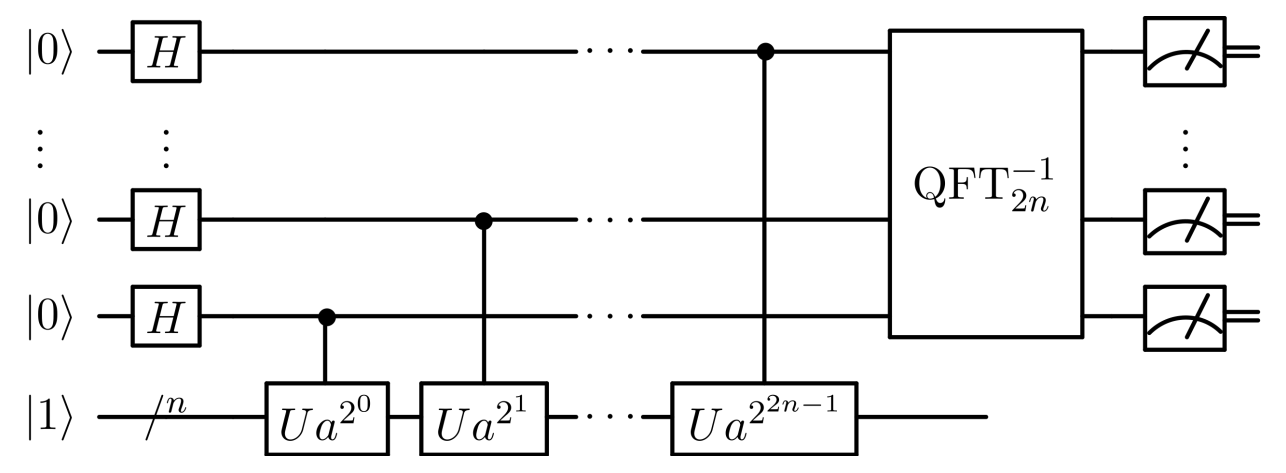

A következőekben azt fogjuk körüljárni egy példa segítségével, hogy miért működik a perióduskereső áramkör.

In [11]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [1,2,4,7,8,11,13,14]:
        raise ValueError("'a' must be 1,2,4,7,8,11,13 or 14")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13,14]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U


In [12]:
"""n-qubit QFTdagger the first n qubits in circ"""
def qft_dagger(n):
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [13]:
"""encoding the binary form of an i integer into n quntum bits"""
def encode(i, n):
    if 2**n <= i:
        raise ValueError("'i' is too big to be stored on n qubits")
    bits = np.array(list(format(i, "b")), dtype=int)
    while len(bits) < n:
        bits = np.insert(bits, 0, 0)
    qc = QuantumCircuit(n)
    for j in range(len(bits)):
        if bits[j]  == 1:
            qc.x(n-j-1)
    qc.name = "%i" %i
    return qc

In [15]:
def run(qc, backend=simulator):
    job = execute(qc, backend=backend, shots=1)
    if backend != simulator:
        job_monitor(job)
    counts = job.result().get_counts()
    bits = list(list(counts)[0])
    result = 0
    for j in range(len(bits)):
        result += int(bits[j])*2**(len(bits)-1-j)
    return result

**3. feladat (szorgalmi)**

Ellenőrizzük, hogy a **c_amod15(7, 1)** kvantum kapu tényleg 7-el modulo 15 szorzó kapu kontrollált verziója. 

In [24]:
# megoldás helye



**4. feladat**
Rakjuk össze a fenti ábrán látható áramkört az $a=7$, $N=15$ esetre pár változtatással: a $H$ kapuk helyett a kontroll qubitekbe írjunk bele egy $k$ egész számot. (Ehhez használhatjuk az encode($k$) függvényt.) A kvantum Fourier-transzformációt hagyjuk ki és a kontroll qubitek helyett a $b$ szám értékét mérjük meg. Használjunk 3 darab kontroll qubitet.

Állítás: Az így kapott áramkör mérésekor $a^k$ $\text{mod}$ $N$-t, azaz $7^k$ $\text{mod}$ $15$-öt mérjük. 

**(a)** Ellenőrizzük ezt az állítást $i$ három különböző értékére. (pl $k = 2, 3, 4$)<br>
**(b) (Szorgalmi)** Gondoljuk végig, hogy az állítás minden $a$ és $k$ szám esetén igaz. Segítség: Ehhez lényegében azt kell belátni, hogy $a^{2^0k_0}\cdot a^{2^1k_1}\cdot...\cdot a^{2^{n-2}k_{n-2}}\cdot a^{2^{n-1}k_{n-1}} = a^k$. Itt $k_j$ a $k$ egész szám kettes számrendszerbeli alakjának a $2^j$ helyi értéken szereplő számjegye. <br><br>
**Megjegyzés**: Vegyük észre, hogy ebben a feladatban összerakott kvantumáramkörben csak olyan műveleteket használtunk, melyeket klasszikus számítógépen is el lehet végezni.

In [25]:
# megoldás helye



**5. feladat** 

A fenti ábra alapján rakjuk össze azt a kvantumáramkört, ami megkeresi az $a= 7$ szám $N=15$ szerinti periódusát. Ehhez használjunk 3 darab kontroll qubitet. Rajzoltassuk ki a kapott kvantumáramkört. (Ehhez használjuk a qc.draw() parancsot.)<br><br>


**Megjegyzés**: A Hadamard kapukkal azt érjük el, hogy kontroll qubiteken a $0$, $1$, ..., $2^k-1$ számok egyenlő szuperpozíciója jelenik meg. Tehát úgy gondolhatunk az áramkörre, hogy párhuzamosan számoljuk ki $a^{0}$, $a^{1}$, ..., $a^{2^k-1}$ számokat. Ezen ismeretében a periódust meg tudnánk határozni. Tudjuk azonban, hogy hiába tartalmazza a kvantumáramkör a szükséges információt, ehhez nem tudunk hozzáférni. Az áramkör mérésekor ugyanis csak egy számot kapunk. Ezért van szükség a kvantum Fourier-transzformáció inverzére, hogy kinyerjük a számunkra fontos adatot a kvantumáramkörből, ami az $r$ periódus. Ehhez nem az ábrán lent látható $n$ darab qubitet kell mérni (ahogy a 4. feladatban), hanem a kontroll qubiteket.

In [26]:
# megoldás helye



**6. feladat**

A kvantumáramkör futtatásának eredménye egy bitsztring. A korábbiak ismeretében gondoljuk végig, hogy hogyan tudjuk ebből kiolvasni az $r$ periódust. <br><br>

**7. feladat**

Futtassuk le a kvantumáramkört és a kapott eredmény alapján határozzuk meg az $a=7$ szám $N=15$ szerinti periódusát. A perióduskereső eljárás nem mindig az $r$ periódust adja vissza. Van, hogy $r$ egy osztóját kapjuk. Ezért ellenőrizni kell, hogy az $r$ periódust kaptuk-e. Ha nem, akkor újra kell futtatni a kvantumáramkört, addig amíg meg nem kapjuk a periódust.

In [27]:
# megoldás helye




**8. feladat**

A periódus alapján határozzuk meg a 15 szám egy osztóját.

In [28]:
# megoldás helye

